In [2]:
import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import spikegen

import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

In [3]:
time_step = 1e-3
R = 5
C = 1e-3

# leaky integrate and fire neuron, tau=5e-3
lif1 = snn.Lapicque(R=R, C=C, time_step=time_step)

In [4]:

num_steps = 200



In [5]:
def plot_current_pulse_response(current_input, membrane_record, title, vline1=None, vline2=None):
    plt.figure(figsize=(12, 5))

    # Plot current input
    plt.subplot(1, 2, 1)
    plt.plot(current_input.numpy(), color='orange')
    plt.title("Input Current")
    plt.xlabel("Time step")
    plt.ylabel("Input Current (I_in)")
    plt.ylim(0, 0.2)
    if vline1:
        plt.axvline(x=vline1, color='gray', linestyle='--')  
    if vline2:
        plt.axvline(x=vline2, color='gray', linestyle='--') 

    # Plot membrane potential
    plt.subplot(1, 2, 2)
    plt.plot(membrane_record.detach().numpy(), color='blue')
    plt.title("Membrane Potential")
    plt.xlabel("Time step")
    plt.ylabel("Membrane Potential (Umem)")
    plt.ylim(0, 0.7)  
    if vline1:
        plt.axvline(x=vline1, color='gray', linestyle='--')  
    if vline2:
        plt.axvline(x=vline2, color='gray', linestyle='--')  

    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



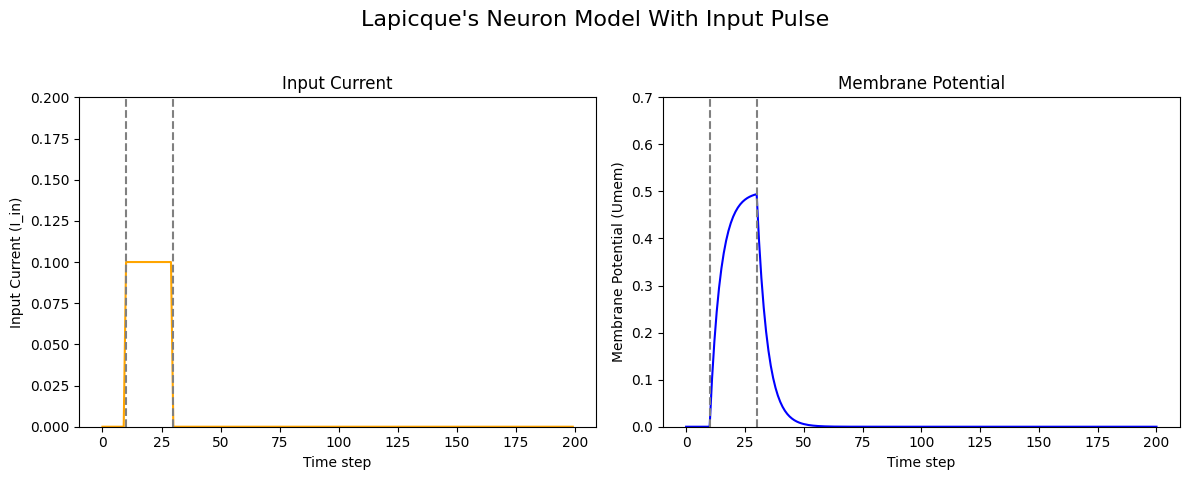

In [6]:
# Initialize current pulse, membrane and outputs
cur_in1 = torch.cat((torch.zeros(10), torch.ones(20)*(0.1), torch.zeros(170)), 0)  # input turns on at t=10, off at t=30
mem = torch.zeros(1)
spk_out = torch.zeros(1)
mem_rec1 = [mem]

# neuron simulation
for step in range(num_steps):
  spk_out, mem = lif1(cur_in1[step], mem)
  mem_rec1.append(mem)
mem_rec1 = torch.stack(mem_rec1)

# Call the function with the specified parameters
plot_current_pulse_response(cur_in1, mem_rec1, "Lapicque's Neuron Model With Input Pulse", vline1=10, vline2=30)


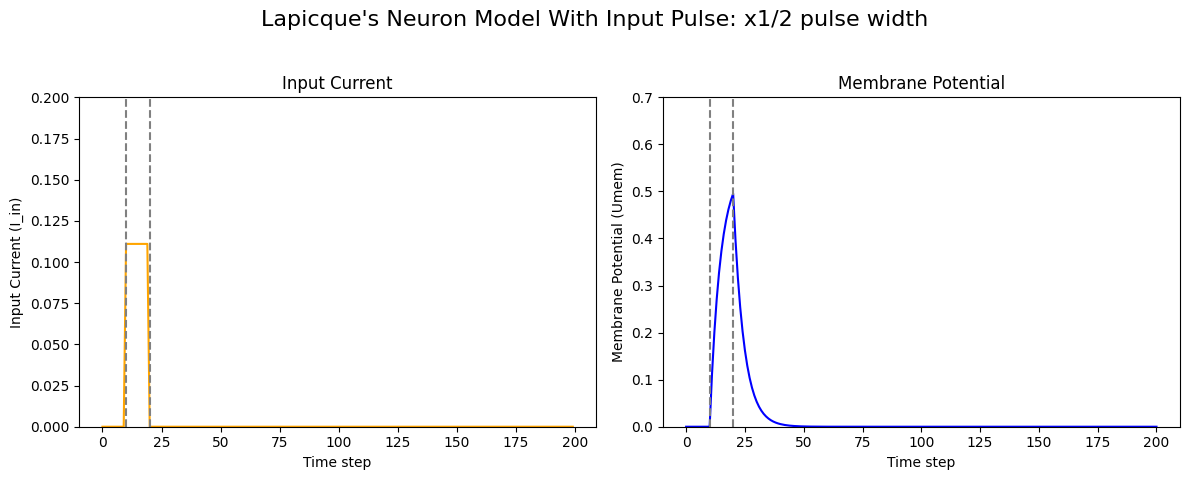

In [7]:
# Increase amplitude of current pulse; half the time.
cur_in2 = torch.cat((torch.zeros(10), torch.ones(10)*0.111, torch.zeros(180)), 0)  # input turns on at t=10, off at t=20
mem = torch.zeros(1)
spk_out = torch.zeros(1)
mem_rec2 = [mem]

# neuron simulation
for step in range(num_steps):
  spk_out, mem = lif1(cur_in2[step], mem)
  mem_rec2.append(mem)
mem_rec2 = torch.stack(mem_rec2)

plot_current_pulse_response(cur_in2, mem_rec2, "Lapicque's Neuron Model With Input Pulse: x1/2 pulse width",
                            vline1=10, vline2=20)

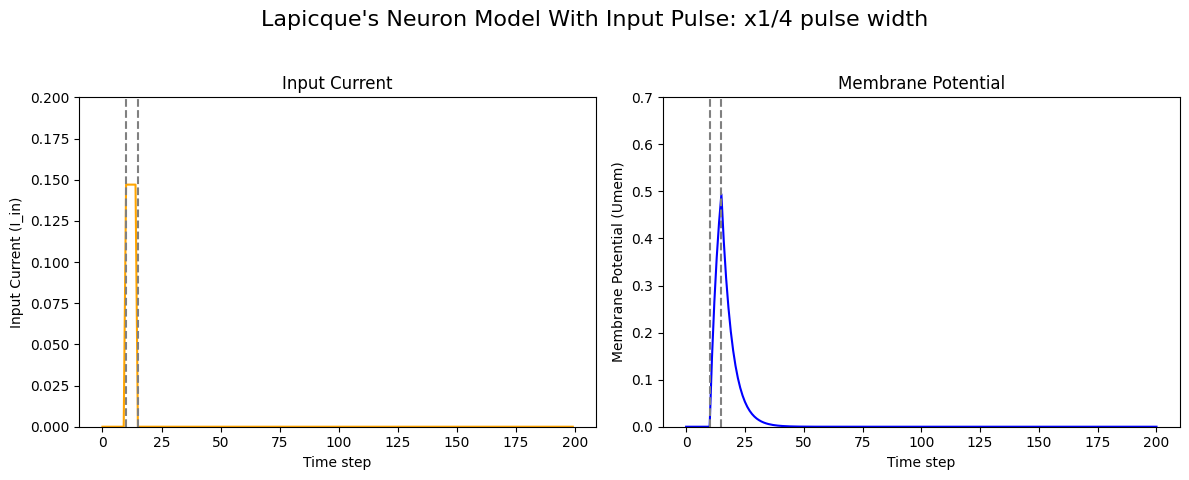

In [8]:
# Increase amplitude of current pulse; quarter the time.
cur_in3 = torch.cat((torch.zeros(10), torch.ones(5)*0.147, torch.zeros(185)), 0)  # input turns on at t=10, off at t=15
mem = torch.zeros(1)
spk_out = torch.zeros(1)
mem_rec3 = [mem]

# neuron simulation
for step in range(num_steps):
  spk_out, mem = lif1(cur_in3[step], mem)
  mem_rec3.append(mem)
mem_rec3 = torch.stack(mem_rec3)

plot_current_pulse_response(cur_in3, mem_rec3, "Lapicque's Neuron Model With Input Pulse: x1/4 pulse width",
                            vline1=10, vline2=15)

In [9]:
def compare_plots(cur_in1, cur_in2, cur_in3, mem_rec1, mem_rec2, mem_rec3, vline1, vline2, vline3, vline4, title):
    plt.figure(figsize=(12, 6))

    # Plot current inputs
    plt.subplot(1, 2, 1)
    plt.plot(cur_in1.numpy(), color='green', label='Input 1')
    plt.plot(cur_in2.numpy(), color='orange', label='Input 2')
    plt.plot(cur_in3.numpy(), color='blue', label='Input 3')
    plt.axvline(x=vline1, color='gray', linestyle='--')  
    plt.axvline(x=vline2, color='gray', linestyle='--')  
    plt.axvline(x=vline3, color='gray', linestyle='--')  
    plt.axvline(x=vline4, color='gray', linestyle='--')  
    plt.title("Input Currents")
    plt.xlabel("Time step")
    plt.ylabel("Input Current (I_in)")
    plt.ylim(0, 0.2) 
    plt.legend()

    # Plot membrane potentials
    plt.subplot(1, 2, 2)
    plt.plot(mem_rec1.detach().numpy(), color='green', label='Membrane Potential 1')
    plt.plot(mem_rec2.detach().numpy(), color='orange', label='Membrane Potential 2')
    plt.plot(mem_rec3.detach().numpy(), color='blue', label='Membrane Potential 3')
    plt.axvline(x=vline1, color='gray', linestyle='--') 
    plt.axvline(x=vline2, color='gray', linestyle='--')  
    plt.axvline(x=vline3, color='gray', linestyle='--')  
    plt.axvline(x=vline4, color='gray', linestyle='--')  
    plt.title("Membrane Potentials")
    plt.xlabel("Time step")
    plt.ylabel("Membrane Potential (Umem)")
    plt.ylim(0, 0.7)
    plt.legend()

    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


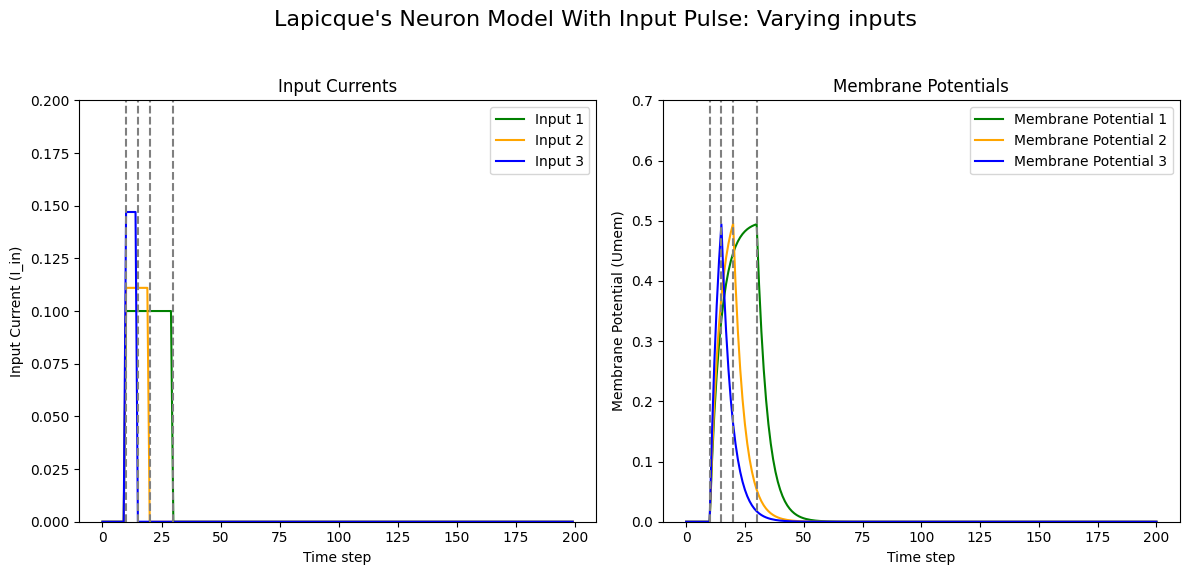

In [10]:
compare_plots(cur_in1, cur_in2, cur_in3, mem_rec1, mem_rec2, mem_rec3, 10, 15,
              20, 30,"Lapicque's Neuron Model With Input Pulse: Varying inputs")

In [17]:
def plot_current_pulse_response(current_input, membrane_record, title, vline1=None, ylim_max1=None):
    plt.figure(figsize=(12, 5))

    # Plot current input
    plt.subplot(1, 2, 1)
    plt.plot(current_input.numpy(), color='orange')
    plt.title("Input Current")
    plt.xlabel("Time step")
    plt.ylabel("Input Current (I_in)")
    plt.ylim(0, 0.6)  
    if vline1:
        plt.axvline(x=vline1, color='gray', linestyle='--')

    # Plot membrane potential
    plt.subplot(1, 2, 2)
    plt.plot(membrane_record.detach().numpy(), color='blue')
    plt.title("Membrane Potential")
    plt.xlabel("Time step")
    plt.ylabel("Membrane Potential (Umem)")
    if ylim_max1:
        plt.ylim(0, 1.0) 
    else:
        plt.ylim(0, 1)  
    if vline1:
        plt.axvline(x=vline1, color='gray', linestyle='--')

    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


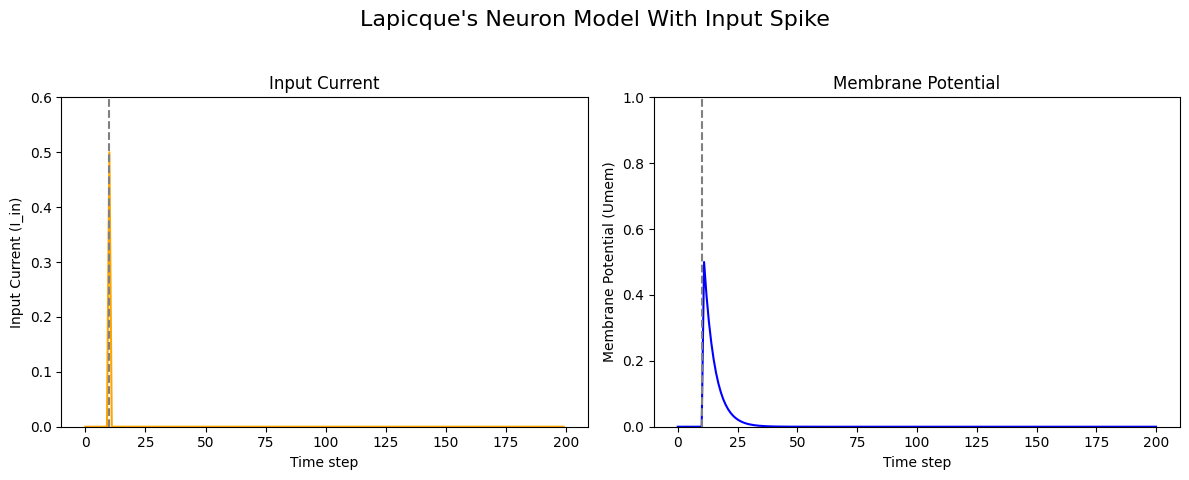

In [18]:
# Current spike input
cur_in4 = torch.cat((torch.zeros(10), torch.ones(1)*0.5, torch.zeros(189)), 0)  # input only on for 1 time step
mem = torch.zeros(1)
spk_out = torch.zeros(1)
mem_rec4 = [mem]

# neuron simulation
for step in range(num_steps):
  spk_out, mem = lif1(cur_in4[step], mem)
  mem_rec4.append(mem)
mem_rec4 = torch.stack(mem_rec4)

plot_current_pulse_response(cur_in4, mem_rec4, "Lapicque's Neuron Model With Input Spike",
                            vline1=10, ylim_max1=0.6)